In [1]:
GPU_NUMBER = 3

In [2]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import mmcv

In [3]:
config_file = '../config.py'
checkpoint_file = '../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [4]:
config = mmcv.Config.fromfile(config_file)
model = init_segmentor(config, checkpoint_file, device='cuda:{}'.format(GPU_NUMBER))
img = '../sample/demo.png'

In [5]:
result = inference_segmentor(model, img)

/data-non-pii-share/rd_ai/mohan/anaconda3/envs/open-mmlab-2/lib/python3.7/site-packages/mmseg/models/segmentors/base.py:267: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


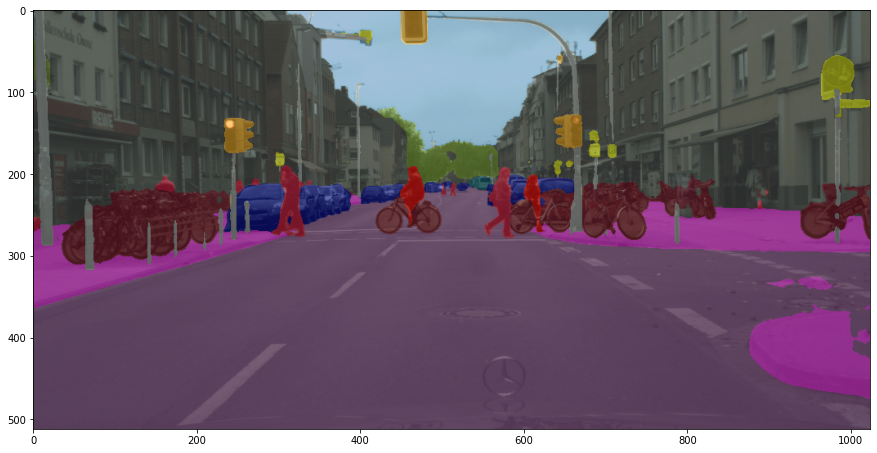

In [6]:
show_result_pyplot(model, img, result, get_palette('cityscapes'))

In [7]:
get_palette('cityscapes')

[[128, 64, 128],
 [244, 35, 232],
 [70, 70, 70],
 [102, 102, 156],
 [190, 153, 153],
 [153, 153, 153],
 [250, 170, 30],
 [220, 220, 0],
 [107, 142, 35],
 [152, 251, 152],
 [70, 130, 180],
 [220, 20, 60],
 [255, 0, 0],
 [0, 0, 142],
 [0, 0, 70],
 [0, 60, 100],
 [0, 80, 100],
 [0, 0, 230],
 [119, 11, 32]]

In [8]:
len(get_palette('cityscapes'))

19

In [9]:
result[0].shape

(512, 1024)

In [10]:
get_palette??

Signature: get_palette(dataset)
Source:   
def get_palette(dataset):
    """Get class palette (RGB) of a dataset."""
    alias2name = {}
    for name, aliases in dataset_aliases.items():
        for alias in aliases:
            alias2name[alias] = name

    if mmcv.is_str(dataset):
        if dataset in alias2name:
            labels = eval(alias2name[dataset] + '_palette()')
        else:
            raise ValueError(f'Unrecognized dataset: {dataset}')
    else:
        raise TypeError(f'dataset must a str, but got {type(dataset)}')
    return labels
File:      /data-non-pii-share/rd_ai/mohan/anaconda3/envs/open-mmlab-2/lib/python3.7/site-packages/mmseg/core/evaluation/class_names.py
Type:      function


In [12]:
model

EncoderDecoder(
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): SyncBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): SyncBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): SyncBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): SyncBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [13]:
model??

Signature:      model(*input, **kwargs)
Type:           EncoderDecoder
String form:   
EncoderDecoder(
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): SyncBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): SyncBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): SyncBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bia

In [18]:
model.show_result??

Signature:
model.show_result(
    img,
    result,
    palette=None,
    win_name='',
    show=False,
    wait_time=0,
    out_file=None,
)
Source:   
    def show_result(self,
                    img,
                    result,
                    palette=None,
                    win_name='',
                    show=False,
                    wait_time=0,
                    out_file=None):
        """Draw `result` over `img`.

        Args:
            img (str or Tensor): The image to be displayed.
            result (Tensor): The semantic segmentation results to draw over
                `img`.
            palette (list[list[int]]] | np.ndarray | None): The palette of
                segmentation map. If None is given, random palette will be
                generated. Default: None
            win_name (str): The window name.
            wait_time (int): Value of waitKey param.
                Default: 0.
            show (bool): Whether to show the image.
                Defaul

In [19]:
model.CLASSES

('road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'bicycle')

In [20]:
model.PALETTE

[[128, 64, 128],
 [244, 35, 232],
 [70, 70, 70],
 [102, 102, 156],
 [190, 153, 153],
 [153, 153, 153],
 [250, 170, 30],
 [220, 220, 0],
 [107, 142, 35],
 [152, 251, 152],
 [70, 130, 180],
 [220, 20, 60],
 [255, 0, 0],
 [0, 0, 142],
 [0, 0, 70],
 [0, 60, 100],
 [0, 80, 100],
 [0, 0, 230],
 [119, 11, 32]]